# Data Exploration 

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [40]:
# Importing Excel file, calling the DataFrame comp_df
comp_df = pd.read_excel("Competition1_raw_data_fixed.xlsx")

# In Excel, we edited column names to omit paranetheses. 
# We also handled 8 missing values in the I3 columns using SICCODE.com to find missing values 
# For those with multiple SIC codes, we chose the primary one - found from SICCODE.com
# For those with NASIC codes, we converted them to SIC codes. 

# Checking import 
comp_df.head(15)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


In [41]:
# Checking out the data
comp_df.info()

# Not taking into account missing values
# 682 is the total amount of rows in the Dataset as confirmed with the Excel file 
# This can be further seen looking at the tenth row 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1        682 non-null object
I2        682 non-null object
I3        682 non-null int64
P_IPO     682 non-null object
P_H       682 non-null object
P_L       682 non-null object
P_1DAY    682 non-null object
C1        682 non-null object
C2        682 non-null object
C3        682 non-null object
C4        682 non-null object
C5        682 non-null object
C6        682 non-null object
C7        682 non-null object
T1        682 non-null object
T2        682 non-null object
T3        682 non-null object
T4        682 non-null object
T5        682 non-null object
S1        682 non-null object
S2        682 non-null object
S3        682 non-null object
dtypes: int64(1), object(21)
memory usage: 117.3+ KB


In [42]:
# Having Python recognize that there are missing values in the dataset. 

# Since Python is not recognizing the "-" as missing values, we are replacing said values.
# Using np.nan as the value, the dataset recognizes that the value is Not a Number
comp_df.replace(to_replace="-", value=np.nan, inplace=True)

In [43]:
#Checking Row 10 now, the "-" are replaced with NaN 
comp_df.head(15)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [44]:
#By changing the value of the "-" in the dataframe, Python was able to recognize 
#that there are missing values and the datatypes are NOT non-null objects
#But rather the first three columns are non-null objects and the rest are floats.
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1        682 non-null object
I2        682 non-null object
I3        682 non-null int64
P_IPO     677 non-null float64
P_H       672 non-null float64
P_L       672 non-null float64
P_1DAY    660 non-null float64
C1        660 non-null float64
C2        660 non-null float64
C3        646 non-null float64
C4        660 non-null float64
C5        676 non-null float64
C6        676 non-null float64
C7        610 non-null float64
T1        681 non-null float64
T2        681 non-null float64
T3        681 non-null float64
T4        681 non-null float64
T5        681 non-null float64
S1        681 non-null float64
S2        681 non-null float64
S3        681 non-null float64
dtypes: float64(19), int64(1), object(2)
memory usage: 117.3+ KB


In [45]:
# checking for null values 
print(comp_df.isnull().sum(axis=0).tolist())

[0, 0, 0, 5, 10, 10, 22, 22, 22, 36, 22, 6, 6, 72, 1, 1, 1, 1, 1, 1, 1, 1]


**Imputing Values of Non-Categorical Data**

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb90b23c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb90b2a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb90b20f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb90bd128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb90bd470>],
 'means': []}

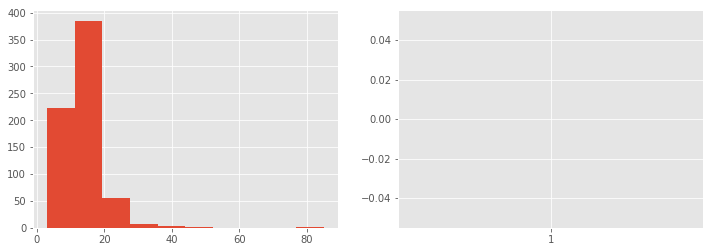

In [48]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist((comp_df['P_IPO']))
ax2.boxplot((comp_df['P_IPO']))
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8ffb470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8ffbb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8ffb198>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb90051d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb9005518>],
 'means': []}

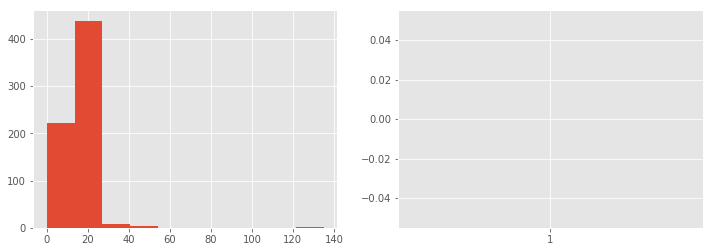

In [49]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['P_H'])
ax2.boxplot(comp_df['P_H'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8f39f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8f435f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8f39c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8f43c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8f43fd0>],
 'means': []}

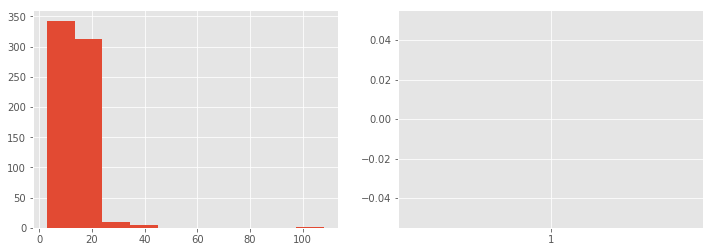

In [50]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['P_L'])
ax2.boxplot(comp_df['P_L'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8e82e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8e8e518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8e82b70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8e8eba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8e8eef0>],
 'means': []}

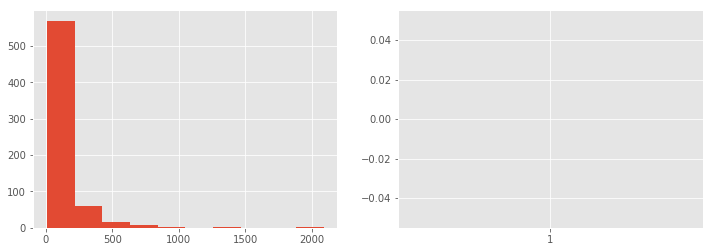

In [51]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['C1'])
ax2.boxplot(comp_df['C1'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8dc2c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8dce320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8dc2978>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8dce9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8dcecf8>],
 'means': []}

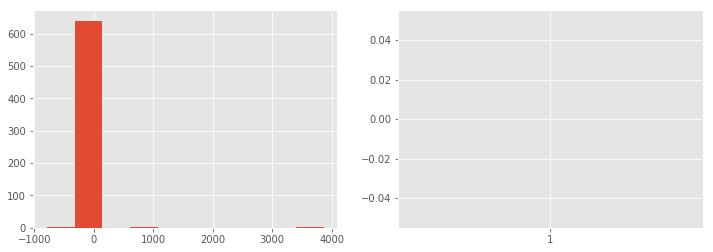

In [52]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['C3'])
ax2.boxplot(comp_df['C3'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8d0b748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8d0bdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8d0b470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8d184a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8d187f0>],
 'means': []}

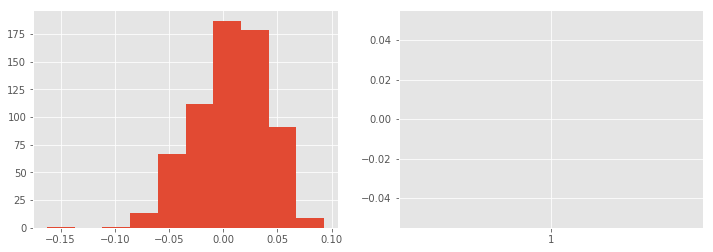

In [53]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['C4'])
ax2.boxplot(comp_df['C4'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8c564a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8c56b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8c561d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8c60208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8c60550>],
 'means': []}

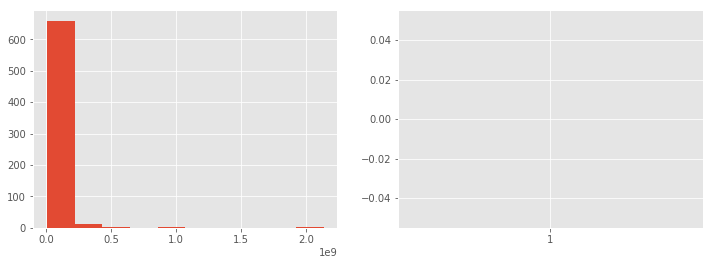

In [54]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['C5'])
ax2.boxplot(comp_df['C5'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8b785f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8b78c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8b78320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8b83358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8b836a0>],
 'means': []}

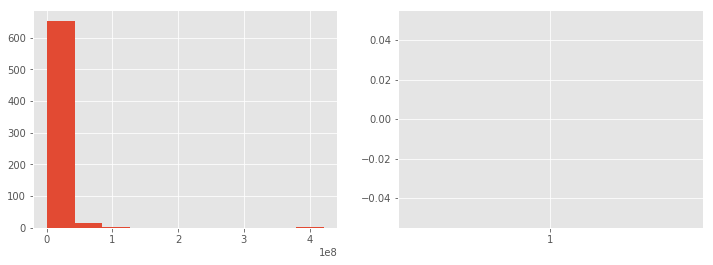

In [55]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['C6'])
ax2.boxplot(comp_df['C6'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8aaba20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8ab50f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8aab748>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8ab5780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8ab5ac8>],
 'means': []}

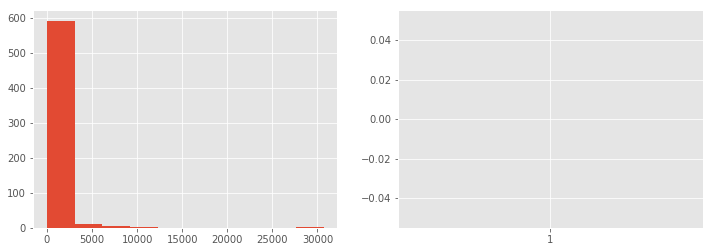

In [56]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['C7'])
ax2.boxplot(comp_df['C7'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb89ee908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb89eef98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb89ee630>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb89f9668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb89f99b0>],
 'means': []}

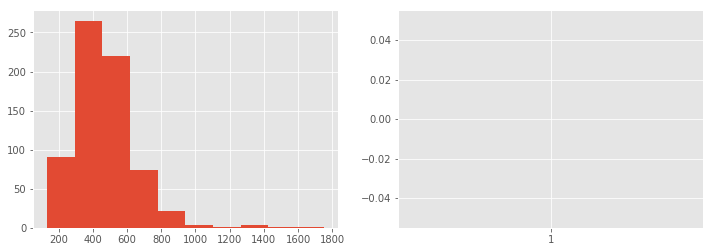

In [57]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['T1'])
ax2.boxplot(comp_df['T1'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8935fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb89406a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8935cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8940d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb89490b8>],
 'means': []}

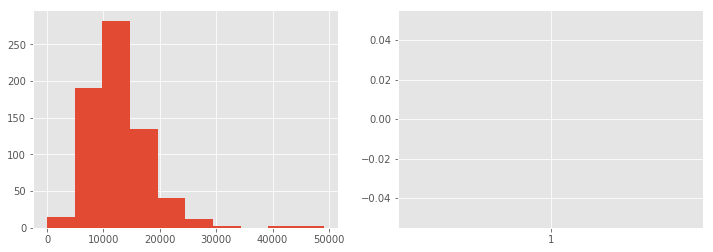

In [58]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['T2'])
ax2.boxplot(comp_df['T2'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb88814a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8881b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb88811d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb888c208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb888c550>],
 'means': []}

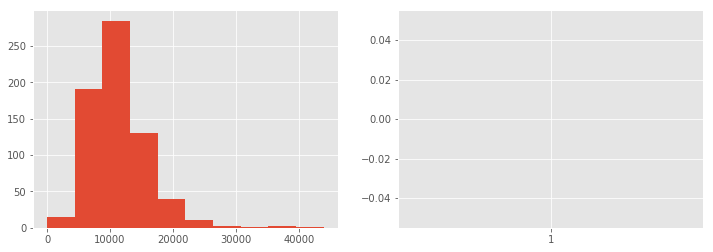

In [59]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['T3'])
ax2.boxplot(comp_df['T3'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb87c5160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb87c57f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb87b8eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb87c5e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb87cd208>],
 'means': []}

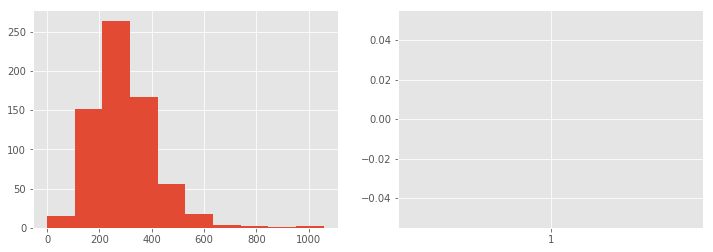

In [60]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['T4'])
ax2.boxplot(comp_df['T4'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8702668>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb8702cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8702390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb870e3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb870e710>],
 'means': []}

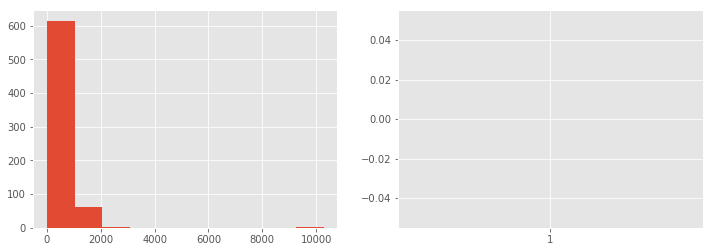

In [61]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['T5'])
ax2.boxplot(comp_df['T5'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb8641f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb864e5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb8641c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb864ec88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb864efd0>],
 'means': []}

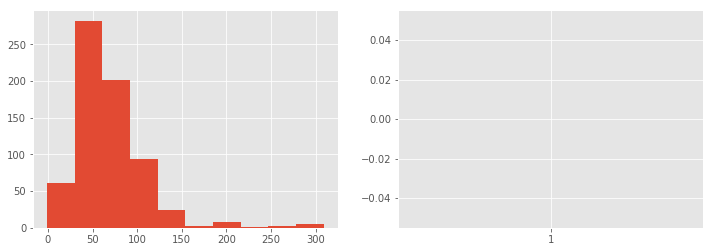

In [62]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['S1'])
ax2.boxplot(comp_df['S1'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb858ca20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb85970f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb858c748>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb8597780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb8597ac8>],
 'means': []}

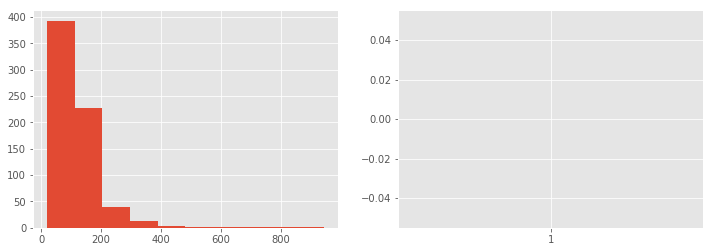

In [63]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['S2'])
ax2.boxplot(comp_df['S2'])
# Not Normalized, use Median to impute 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7eb84d9908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7eb84d9f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7eb84d9630>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7eb84e6668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7eb84e69b0>],
 'means': []}

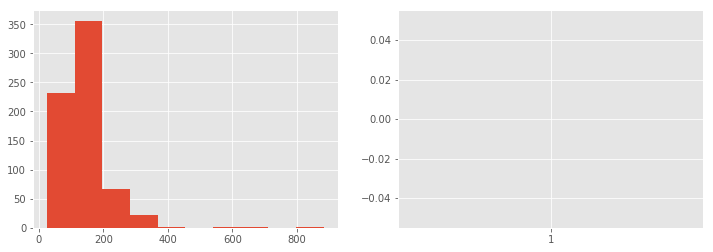

In [64]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(comp_df['S3'])
ax2.boxplot(comp_df['S3'])
# Not Normalized, use Median to impute 

In [65]:
#Using MEDIAN of column to fill in Continuous/Float columns
#Using MODE of column to fill in Binary/Boolean columns 
comp_df['P_IPO'].fillna(comp_df['P_IPO'].median(), inplace=True)
comp_df['P_H'].fillna(comp_df['P_H'].median(), inplace=True)
comp_df['P_L'].fillna(comp_df['P_L'].median(), inplace=True)
comp_df['P_1DAY'].fillna(comp_df['P_1DAY'].median(), inplace=True)
comp_df['C1'].fillna(comp_df['C1'].median(), inplace=True)
comp_df['C2'].fillna(comp_df['C2'].mode()[0], inplace=True)
comp_df['C3'].fillna(comp_df['C3'].median(), inplace=True)
comp_df['C4'].fillna(comp_df['C4'].median(), inplace=True)
comp_df['C5'].fillna(comp_df['C5'].median(), inplace=True)
comp_df['C6'].fillna(comp_df['C6'].median(), inplace=True)
comp_df['C7'].fillna(comp_df['C7'].median(), inplace=True)
comp_df['T1'].fillna(comp_df['T1'].median(), inplace=True)
comp_df['T2'].fillna(comp_df['T2'].median(), inplace=True)
comp_df['T3'].fillna(comp_df['T3'].median(), inplace=True)
comp_df['T4'].fillna(comp_df['T4'].median(), inplace=True)
comp_df['T5'].fillna(comp_df['T5'].median(), inplace=True)
comp_df['S1'].fillna(comp_df['S1'].median(), inplace=True)
comp_df['S2'].fillna(comp_df['S2'].median(), inplace=True)
comp_df['S3'].fillna(comp_df['S3'].median(), inplace=True)
comp_df.head(15)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,103.833,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [66]:
# Creating Target Variable Y1 = Pre-IPO Price Revision
comp_df['Y1']= np.where(comp_df['P_IPO']<((comp_df['P_H']+comp_df['P_L'])/2), 1, 0)
comp_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,Y1
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0


In [67]:
# Creating Target Variable Y2 = Post-IPO Initial Return 
comp_df['Y2']= np.where(comp_df['P_IPO']<comp_df['P_1DAY'], 1, 0)
comp_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T1,T2,T3,T4,T5,S1,S2,S3,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,1


In [68]:
# Creating Control Variable C3' = Positive EPS Dummy
comp_df["C3'"]=np.where(comp_df['C3']>0, 1, 0)
comp_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T2,T3,T4,T5,S1,S2,S3,Y1,Y2,C3'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,1,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,0,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,1,0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,1,1


In [69]:
# Creating Control Variable C5' = Share Overhang
comp_df["C5'"]=(comp_df['C5']/comp_df['C6'])
comp_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T3,T4,T5,S1,S2,S3,Y1,Y2,C3',C5'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,11560.0,301.0,690.0,62.0,117.0,139.0,0,1,1,3.864345
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0,0,12.028832
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,4785.0,128.0,325.0,61.0,33.0,60.0,1,0,0,3.369134
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,7574.0,177.0,509.0,80.0,59.0,110.0,1,1,0,3.299697
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,13176.0,336.0,720.0,67.0,149.0,167.0,0,1,1,3.726269


In [70]:
# Creating P(mid) Variable to help with the creation of the Control Variable C6'
comp_df["P(mid)"]=(comp_df['P_H']+comp_df['P_L'])/2
comp_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T4,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid)
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,301.0,690.0,62.0,117.0,139.0,0,1,1,3.864345,9.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,510.0,1120.0,71.0,242.0,237.0,1,0,0,12.028832,9.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,128.0,325.0,61.0,33.0,60.0,1,0,0,3.369134,13.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,177.0,509.0,80.0,59.0,110.0,1,1,0,3.299697,15.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,336.0,720.0,67.0,149.0,167.0,0,1,1,3.726269,20.0


In [71]:
# Creating Control Variable C6' = Up Revision 
comp_df["C6'"]=np.where(comp_df['P_IPO']>comp_df["P(mid)"], (comp_df["P_IPO"]-comp_df["P(mid)"])/comp_df["P(mid)"]*100,0)
comp_df.head(15)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,690.0,62.0,117.0,139.0,0,1,1,3.864345,9.0,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,1120.0,71.0,242.0,237.0,1,0,0,12.028832,9.0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,325.0,61.0,33.0,60.0,1,0,0,3.369134,13.0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,509.0,80.0,59.0,110.0,1,1,0,3.299697,15.0,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,720.0,67.0,149.0,167.0,0,1,1,3.726269,20.0,5.000000
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,815.0,62.0,96.0,181.0,0,1,1,5.724394,13.5,0.000000
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,698.0,82.0,106.0,135.0,1,1,0,3.463095,12.0,0.000000
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,-1.0,55.0,120.0,122.0,1,0,0,2.421469,13.0,0.000000
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,917.0,58.0,124.0,234.0,1,1,0,4.816591,17.0,0.000000
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,459.0,81.0,90.0,147.0,1,0,1,3.056608,18.0,0.000000


In [72]:
# checking for null values 
print(comp_df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [73]:
# Median for DataFrame 
comp_df.median()

I3        3.990000e+03
P_IPO     1.350000e+01
P_H       1.500000e+01
P_L       1.300000e+01
P_1DAY    1.484500e+01
C1        1.070000e+02
C2        1.000000e+00
C3        1.000000e-02
C4        9.124591e-03
C5        2.740018e+07
C6        7.398704e+06
C7        1.038330e+02
T1        4.440000e+02
T2        1.204500e+04
T3        1.078500e+04
T4        2.790000e+02
T5        6.240000e+02
S1        6.000000e+01
S2        1.000000e+02
S3        1.340000e+02
Y1        1.000000e+00
Y2        1.000000e+00
C3'       1.000000e+00
C5'       3.731035e+00
P(mid)    1.400000e+01
C6'       0.000000e+00
dtype: float64

In [74]:
# Mean for DataFrame 
comp_df.mean()

I3        4.871669e+03
P_IPO     1.383519e+01
P_H       1.547413e+01
P_L       1.350749e+01
P_1DAY    2.557703e+01
C1        1.483504e+02
C2        8.636364e-01
C3        1.695003e+00
C4        7.341633e-03
C5        4.916458e+07
C6        1.237106e+07
C7        4.585873e+02
T1        4.656026e+02
T2        1.275756e+04
T3        1.139495e+04
T4        2.943314e+02
T5        6.791393e+02
S1        6.840909e+01
S2        1.200748e+02
S3        1.447434e+02
Y1        5.131965e-01
Y2        7.038123e-01
C3'       5.293255e-01
C5'       4.625317e+00
P(mid)    1.449081e+01
C6'       5.282669e+00
dtype: float64

In [75]:
# Exporting DataFrame as CSV 
comp_df.to_csv('WorkingDataFrame', ',')